# 观众对电影的喜好分析

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

#### 项目数据：
>数据集中包含 1 万多条电影信息，信息来源为“电影数据库”（TMDb，The Movie Database），包括用户评分，票房，电影类别和演职人员等。  
#### 提出问题：
>1、每年最受欢迎的电影类别是哪些？尤其是近几年比较火的电影类别是哪些？  
2、票房高的电影有哪些特点？电影的受关注程度和放映时长是否对票房有影响？  
3、随着社会发展，人们是否越来越关注电影？


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
% matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## 数据整理

### 观察数据集

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据类型，以及是否有缺失数据或错误数据的情况。
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


#### 观察数据情况概述
>1、本数据集有10866行，21列，其中'id', 'imdb_id','budget','revenue', 'homepage', 'tagline','keywords','overview', 'production_companies'这9列对本次分析作用不大，而且其中有几列含有大量空值不利于分析。  
>2、列名称符合要求不用再做处理。  
>3、数据类型基本满足后续数据分析。


### 数据清理
>##### 删除无关列: 并查看是否删除成功

In [3]:
df.drop(columns=['id', 'imdb_id','budget','revenue', 'homepage', 'tagline','keywords','overview', 'production_companies'],
       inplace=True)
df.shape

(10866, 12)

>#### 删除数据集中包含缺失值的任何行,并检查是否删除成功

In [4]:
df.dropna(axis=0,inplace=True)
df.shape

(10732, 12)

>#### 检查是否存在重复行，如果存在需要删除

In [5]:
print(sum(df.duplicated()))
df.drop_duplicates(inplace=True)
df.shape

1


(10731, 12)

<a id='eda'></a>
## 探索性数据分析


### 研究问题 1 ：每年最受欢迎的电影类别是哪些？尤其是近几年比较火的电影类别是哪些？

In [6]:
# 'genres'是电影类别，从上面的数据观察可以看到，这一列中的数据是字符串类型。
# 每部电影可能包含多种电影类别，用“|”进行了分隔
df_genre = df.drop('genres', axis=1).join(df['genres'].str.split('|', expand=True)
    .stack().reset_index(level=1, drop=True).rename('genres'))
df_genre['genres'].value_counts()

Drama              4746
Comedy             3775
Thriller           2902
Action             2376
Romance            1708
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               399
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
Name: genres, dtype: int64

>我们需要让每一种电影类型都统计到，也就是一部电影要记入属于它的每一种电影类型里面。所以我对‘genres’列参数进行了分隔。

In [7]:
# 按年份和电影类型进行分组，然后展示每一组受关注的均值。假设均值的最大值就是最受欢迎的。
df_year_genres = df_genre.groupby([ 'release_year', 'genres'])['popularity'].mean()
df_year_genres.unstack().idxmax(axis=1)

release_year
1960           Thriller
1961          Animation
1962          Adventure
1963          Animation
1964                War
1965              Music
1966          Animation
1967          Animation
1968            Mystery
1969              Crime
1970          Animation
1971             Family
1972              Crime
1973          Animation
1974            Mystery
1975          Adventure
1976              Crime
1977             Action
1978              Music
1979             Action
1980    Science Fiction
1981          Adventure
1982                War
1983          Adventure
1984             Family
1985             Family
1986          Adventure
1987            History
1988          Animation
1989          Animation
1990          Adventure
1991          Animation
1992          Animation
1993            Fantasy
1994              Crime
1995          Animation
1996              Crime
1997    Science Fiction
1998                War
1999          Adventure
2000          Adventure
200

>#### 每一年受关注均值最大的电影类别如上，近些年Adventure，Western，Fantasy是最受欢迎的几种电影类型。

In [8]:
# 按年份和电影类型进行分组，然后展示每一组总票房的均值。假设均值的最大值就是最受欢迎的。
df_year_genres_vote = df_genre.groupby([ 'release_year', 'genres'])['vote_count'].mean()
df_year_genres_vote.unstack().idxmax(axis=1)

release_year
1960           Thriller
1961          Animation
1962                War
1963          Animation
1964                War
1965              Music
1966          Animation
1967          Animation
1968            Mystery
1969              Crime
1970          Animation
1971    Science Fiction
1972              Crime
1973          Animation
1974              Crime
1975          Adventure
1976              Crime
1977    Science Fiction
1978              Music
1979             Action
1980    Science Fiction
1981          Adventure
1982    Science Fiction
1983          Adventure
1984             Family
1985             Family
1986                War
1987            History
1988          Animation
1989             Family
1990             Family
1991          Animation
1992          Animation
1993                War
1994              Crime
1995          Animation
1996              Crime
1997    Science Fiction
1998                War
1999          Adventure
2000          Adventure
200

>#### 每一年总票房均值最大的电影类别如上，近些年Western，Science Fiction，Adventure是最受欢迎的几种电影类型。

### 研究问题 2 ：票房高的电影有哪些特点？电影的受关注程度和放映时长是否对票房有影响？

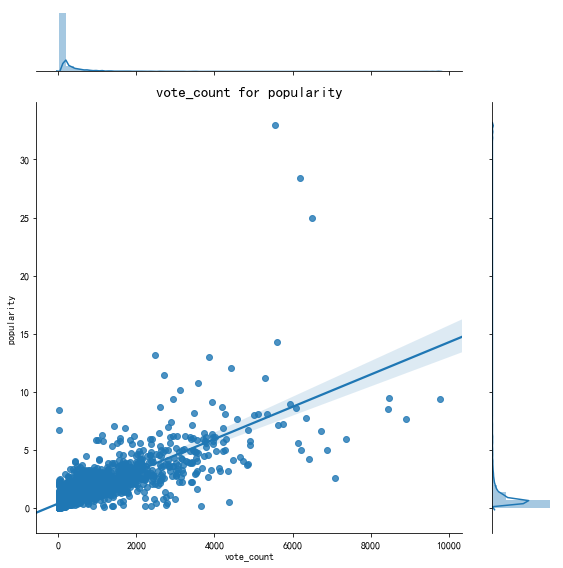

In [9]:
# 研究此问题，需要将'vote_count'列与其它多列进行对比，因为需要知道数据间的关系所以在这里选用散点图进行观察
warnings.filterwarnings("ignore")
def scatter_reg(x,y):
    sns.jointplot(x, y, data=df,  kind="reg", height=8, space=0.5);
    plt.title('{} for {}'.format(x,y),fontsize=15);
    plt.show()

# 受关注度与总票房的关系
scatter_reg('vote_count', 'popularity')

>#### 从上图可以看出一般情况下受关注度越高，票房越高。

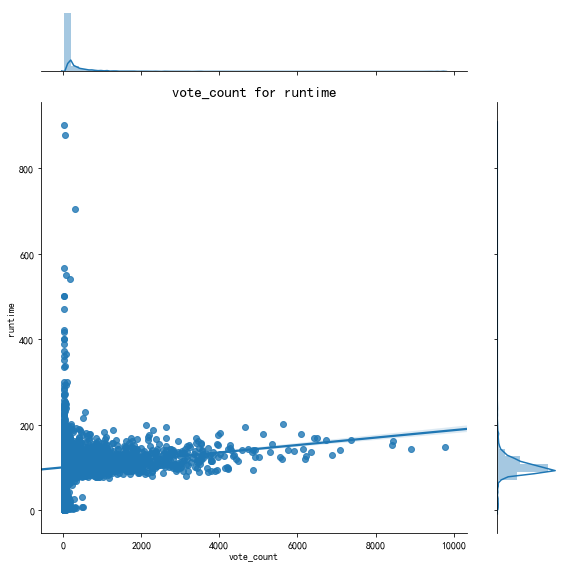

In [10]:
# 放映时长与总票房的关系
scatter_reg('vote_count','runtime')

>#### 从上图可以看出一般情况下在一定时间范围内电影播放时间长度与票房关系不大，但是如果电影放映时长过长或过短（超过230分钟或低于80分钟）那么票房都不会太高。

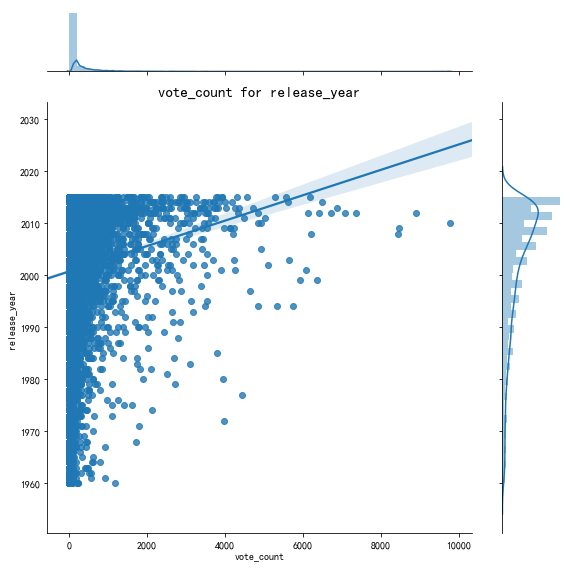

In [11]:
# 首映年份与总票房的关系
scatter_reg('vote_count','release_year')

>#### 从上图可以看出随着时间的增长，电影总票房是越来越高。这也符合随着社会的发展，电影拍摄等技术的提高，人们生活质量提高，越来越多的人愿意花时间和金钱在看电影这件事情上。

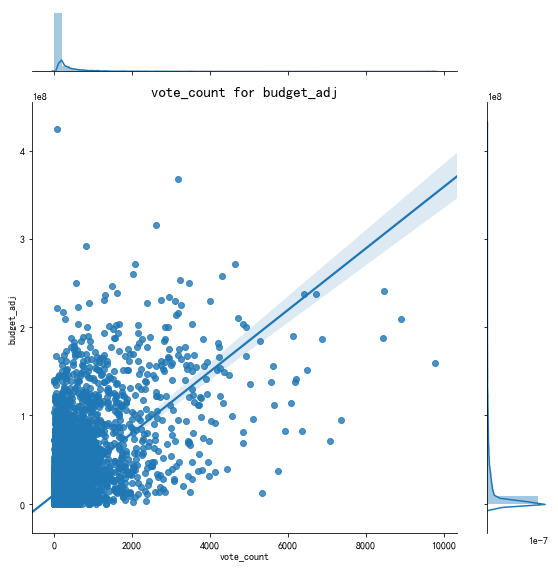

In [12]:
# 电影的预算与总票房的关系
scatter_reg('vote_count','budget_adj')

>#### 从图上看出电影预算和总票房还是有正比关系，但是散点比较散开，说明预算对总票房的影响力有限。

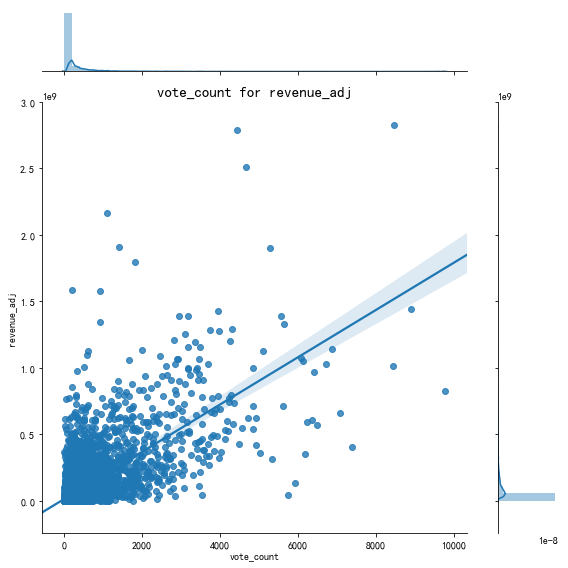

In [13]:
# 电影的收入与总票房的关系
scatter_reg('vote_count','revenue_adj')

>#### 同预算对总票房的影响

### 研究问题 3 ：随着社会发展，人们是否越来越关注电影？

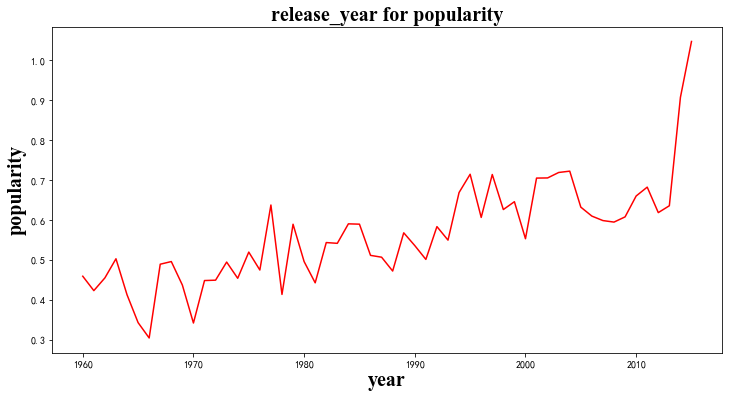

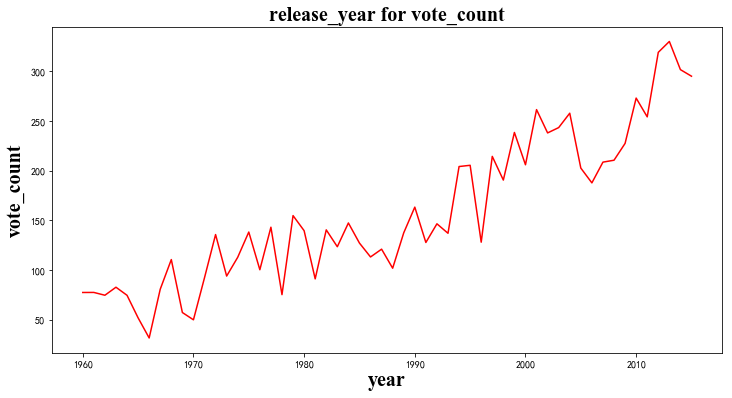

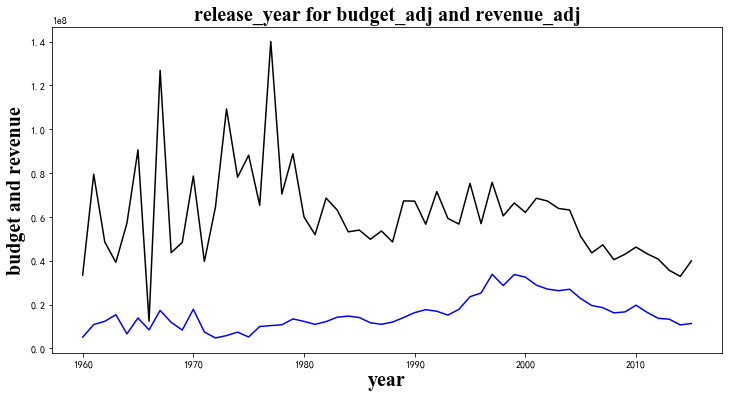

In [14]:
font = {'family' : 'Times New Roman','weight' : 'normal','size'   : 20}

def year_line(y):
    plt.figure(figsize=(12,6))
    plt.plot(df.groupby(['release_year'])[y].mean(), c='red');
    plt.title('release_year for {}'.format(y), font)
    plt.xlabel('year', font)
    plt.ylabel(y, font)

for lists in ['popularity','vote_count']:
    year_line(lists)
    plt.show()

plt.figure(figsize=(12,6))
plt.plot(df.groupby(['release_year'])['budget_adj'].mean(), c='blue', label='budget');
plt.plot(df.groupby(['release_year'])['revenue_adj'].mean(), c='black', label='revenue');
plt.title('release_year for {} and {}'.format('budget_adj','revenue_adj'), font);
plt.xlabel('year', font);
plt.ylabel('budget and revenue', font);
plt.show();

>#### 从上面的折线图可以看出随着年份增加，每年电影的关注均值虽然有波动但是呈上升趋势，总票房也呈上升趋势。预算和收入的年均值表现不明显，但是能看出近10年表现下滑趋势。

<a id='conclusions'></a>
## 结论

>#### 1、经过以上分析单就本次分析的数据集可看出近些年人们更偏爱看Western，Science Fiction，Adventure，Fantasy等类型的电影，得到更高关注的电影更容易创造高的票房，另外人们更愿意花钱去看播放时间在90-230分钟之间的电影。  
>#### 2、增加预算可能一定程度的能让电影票房更高，但是并不绝对，也有很多预算不高但票房很高的电影。  
>#### 3、随着社会的发展人们对电影的关注和消费也会越来越多，但是要做出大家喜爱的电影不是光用钱就能达到的，用心做电影，观众一定能感受到（最后是个人观点不代表数据分析结论）。
>#### 4、就本次分析的数据集中我认为数据不够全面，人们是否花时间和金钱去关注电影和电影上映的具体时间也有一定的关系，比如是否是周末，是否是节假日，是白天还是晚上。另外同期上映的电影相互之间也可能会存在一定的影响。处理数据时删除了空值以及重复数据，但从上面可以看出删除所占比例是非常小的，对后期分析影响不大。